In [178]:
import matplotlib.pyplot as plt, seaborn as sns

In [179]:
# Para medir el rendimiento del carro en millas por galon segun su potencia y su peso
df = sns.load_dataset('mpg')
df.drop('name', axis=1, inplace=True)
df.drop('origin', axis=1, inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [182]:
df.mpg.value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64

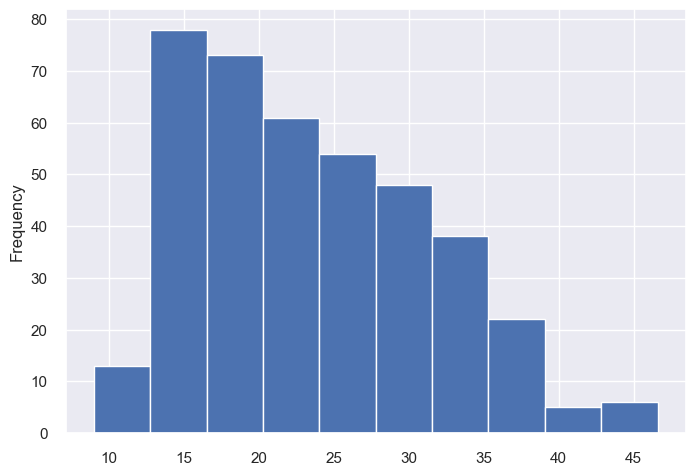

In [183]:
# segmentacion tradicional
df.mpg.plot.hist();

In [184]:
sns.set()

Text(0.5, 0, 'Millas por galon')

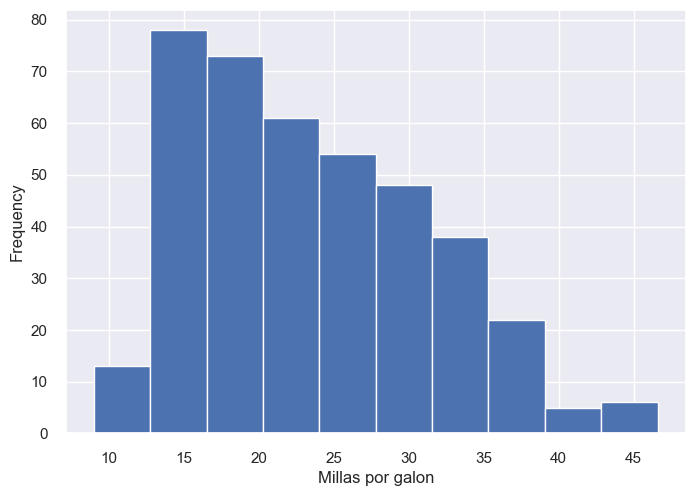

In [185]:
df.mpg.plot.hist();
plt.xlabel('Millas por galon')

In [186]:
import numpy as np

In [187]:
# reglas
# si mpg < 25 bajo
# si mpg < 35 medio
# si mpg >= 35 alto

In [188]:
df['Segmento'] = np.where(df.mpg >= 35, 'Alto', np.where(df.mpg < 25, 'Bajo', 'Medio'))
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento
0,18.0,8,307.0,130.0,3504,12.0,70,Bajo
1,15.0,8,350.0,165.0,3693,11.5,70,Bajo
2,18.0,8,318.0,150.0,3436,11.0,70,Bajo
3,16.0,8,304.0,150.0,3433,12.0,70,Bajo
4,17.0,8,302.0,140.0,3449,10.5,70,Bajo
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Medio
394,44.0,4,97.0,52.0,2130,24.6,82,Alto
395,32.0,4,135.0,84.0,2295,11.6,82,Medio
396,28.0,4,120.0,79.0,2625,18.6,82,Medio


In [189]:
df.groupby('Segmento')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Alto,36.0,38.483333,3.127528,35.0,36.0,37.5,39.75,46.6
Bajo,229.0,17.881223,3.742718,9.0,15.0,18.0,21.00,24.5
Medio,133.0,29.162406,2.939352,25.0,26.6,29.0,31.80,34.7


In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()

In [192]:
col_a_escalar = ['mpg', 'cylinders', 'horsepower', 'weight']
datos_a_escalar = df.copy()

In [193]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [194]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento
0,18.0,8,307.0,130.0,3504,12.0,70,Bajo
1,15.0,8,350.0,165.0,3693,11.5,70,Bajo
2,18.0,8,318.0,150.0,3436,11.0,70,Bajo
3,16.0,8,304.0,150.0,3433,12.0,70,Bajo
4,17.0,8,302.0,140.0,3449,10.5,70,Bajo
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Medio
394,44.0,4,97.0,52.0,2130,24.6,82,Alto
395,32.0,4,135.0,84.0,2295,11.6,82,Medio
396,28.0,4,120.0,79.0,2625,18.6,82,Medio


In [195]:
datos_a_escalar

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento
0,-0.706439,1.498191,307.0,0.664133,0.630870,12.0,70,Bajo
1,-1.090751,1.498191,350.0,1.574594,0.854333,11.5,70,Bajo
2,-0.706439,1.498191,318.0,1.184397,0.550470,11.0,70,Bajo
3,-0.962647,1.498191,304.0,1.184397,0.546923,12.0,70,Bajo
4,-0.834543,1.498191,302.0,0.924265,0.565841,10.5,70,Bajo
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,140.0,-0.480448,-0.213324,15.6,82,Medio
394,2.624265,-0.856321,97.0,-1.364896,-0.993671,24.6,82,Alto
395,1.087017,-0.856321,135.0,-0.532474,-0.798585,11.6,82,Medio
396,0.574601,-0.856321,120.0,-0.662540,-0.408411,18.6,82,Medio


Text(0.5, 0, 'Millas por galon')

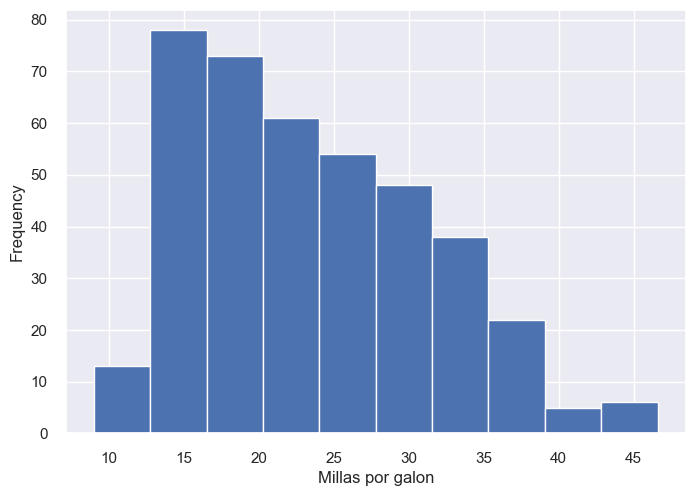

In [196]:
df.mpg.plot.hist();
plt.xlabel('Millas por galon')

In [197]:
cluster_cols = ['mpg', 'weight']

c:\Users\pca20\Documents\GitHub\inteligencia_artificial\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


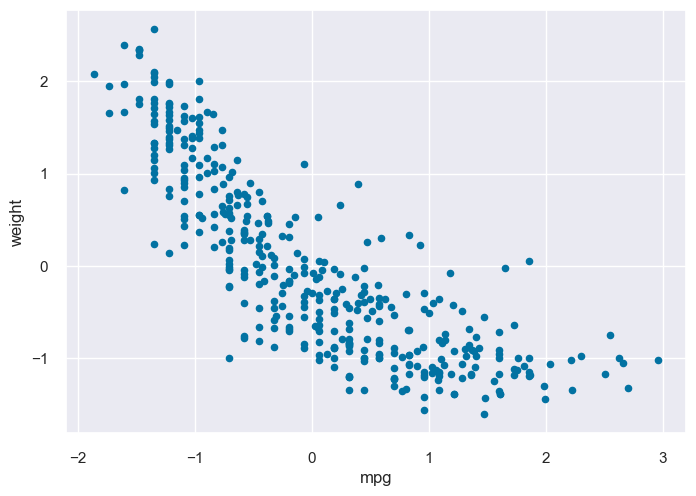

In [198]:
datos_a_escalar.plot.scatter(x='mpg', y='weight');

In [199]:
from sklearn.cluster import KMeans

In [200]:
modelo = KMeans(n_clusters=5, random_state=28)

In [201]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=5, random_state=28)

In [202]:
datos_a_escalar

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento
0,-0.706439,1.498191,307.0,0.664133,0.630870,12.0,70,Bajo
1,-1.090751,1.498191,350.0,1.574594,0.854333,11.5,70,Bajo
2,-0.706439,1.498191,318.0,1.184397,0.550470,11.0,70,Bajo
3,-0.962647,1.498191,304.0,1.184397,0.546923,12.0,70,Bajo
4,-0.834543,1.498191,302.0,0.924265,0.565841,10.5,70,Bajo
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,140.0,-0.480448,-0.213324,15.6,82,Medio
394,2.624265,-0.856321,97.0,-1.364896,-0.993671,24.6,82,Alto
395,1.087017,-0.856321,135.0,-0.532474,-0.798585,11.6,82,Medio
396,0.574601,-0.856321,120.0,-0.662540,-0.408411,18.6,82,Medio


In [203]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [204]:
datos_a_escalar.Segmento.value_counts()

Segmento
Bajo     229
Medio    133
Alto      36
Name: count, dtype: int64

In [205]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    106
4     88
0     85
3     84
2     35
Name: count, dtype: int64

In [206]:
marcador = [
    '.',
    '|',
    'x',
    '*',
    '_',
]

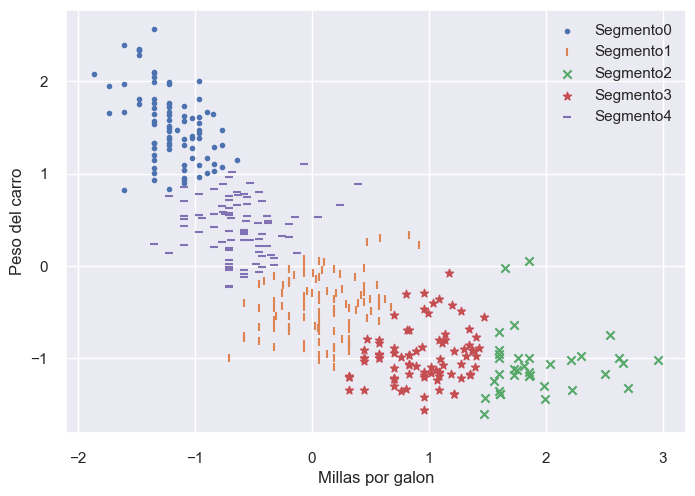

In [207]:
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(temporal.mpg, temporal.weight, marker=marcador[segmento],
                label='Segmento'+str(segmento))
    
    plt.xlabel('Millas por galon')
    plt.ylabel('Peso del carro')
    plt.legend();

In [208]:
# con mas de dos dimensiones

In [209]:
datos_a_escalar[cluster_cols].head()

,mpg,weight
0,-0.706439,0.630870
1,-1.090751,0.854333
2,-0.706439,0.550470
3,-0.962647,0.546923
4,-0.834543,0.565841


In [210]:
modelo2 = KMeans(n_clusters=4, random_state=28)

In [211]:
modelo2.fit(datos_a_escalar[cluster_cols])


KMeans(n_clusters=4, random_state=28)

In [212]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[cluster_cols])

In [213]:
datos_a_escalar


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento,Segmento2,Segmento3
0,-0.706439,1.498191,307.0,0.664133,0.630870,12.0,70,Bajo,4,1
1,-1.090751,1.498191,350.0,1.574594,0.854333,11.5,70,Bajo,4,0
2,-0.706439,1.498191,318.0,1.184397,0.550470,11.0,70,Bajo,4,1
3,-0.962647,1.498191,304.0,1.184397,0.546923,12.0,70,Bajo,4,1
4,-0.834543,1.498191,302.0,0.924265,0.565841,10.5,70,Bajo,4,1
...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,140.0,-0.480448,-0.213324,15.6,82,Medio,1,3
394,2.624265,-0.856321,97.0,-1.364896,-0.993671,24.6,82,Alto,2,2
395,1.087017,-0.856321,135.0,-0.532474,-0.798585,11.6,82,Medio,3,2
396,0.574601,-0.856321,120.0,-0.662540,-0.408411,18.6,82,Medio,1,3


In [214]:
from sklearn import decomposition

In [215]:
pca = decomposition.PCA(n_components=2)
pca_resultado = pca.fit_transform(datos_a_escalar[cluster_cols])
pca_resultado

array([[-9.45619962e-01, -5.34352297e-02],
       [-1.37538180e+00, -1.67172525e-01],
       [-8.88768986e-01, -1.10286206e-01],
       [-1.06742723e+00, -2.93960715e-01],
       [-9.90220744e-01, -1.90000826e-01],
       [-1.91713816e+00,  3.74583833e-01],
       [-2.01858992e+00,  2.94869213e-01],
       [-1.98347608e+00,  2.59755375e-01],
       [-2.07794902e+00,  3.54228321e-01],
       [-1.50664067e+00, -3.59136544e-02],
       [-1.26669611e+00, -2.75858214e-01],
       [-1.39573731e+00, -3.27983390e-01],
       [-1.43223278e+00, -1.10321549e-01],
       [-9.58486425e-01, -7.65234278e-01],
       [ 5.44280712e-01, -4.56337636e-01],
       [-2.23018409e-02, -2.52087839e-01],
       [-3.35308015e-01, -6.63747177e-01],
       [ 9.27817359e-02, -5.48337794e-01],
       [ 1.01835287e+00, -3.86910660e-01],
       [ 1.17440259e+00, -7.24126759e-01],
       [ 3.84050772e-01, -1.14941318e-01],
       [ 4.95790174e-01, -4.07847098e-01],
       [ 6.32355770e-01, -3.63246316e-01],
       [ 8.

In [216]:
datos_a_escalar['PC1'] = pca_resultado[:, 0]
datos_a_escalar['PC2'] = pca_resultado[:, 1]
datos_a_escalar

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Segmento,Segmento2,Segmento3,PC1,PC2
0,-0.706439,1.498191,307.0,0.664133,0.630870,12.0,70,Bajo,4,1,-0.945620,-0.053435
1,-1.090751,1.498191,350.0,1.574594,0.854333,11.5,70,Bajo,4,0,-1.375382,-0.167173
2,-0.706439,1.498191,318.0,1.184397,0.550470,11.0,70,Bajo,4,1,-0.888769,-0.110286
3,-0.962647,1.498191,304.0,1.184397,0.546923,12.0,70,Bajo,4,1,-1.067427,-0.293961
4,-0.834543,1.498191,302.0,0.924265,0.565841,10.5,70,Bajo,4,1,-0.990221,-0.190001
...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,140.0,-0.480448,-0.213324,15.6,82,Medio,1,3,0.466564,0.164878
394,2.624265,-0.856321,97.0,-1.364896,-0.993671,24.6,82,Alto,2,2,2.558267,1.153004
395,1.087017,-0.856321,135.0,-0.532474,-0.798585,11.6,82,Medio,3,2,1.333322,0.203953
396,0.574601,-0.856321,120.0,-0.662540,-0.408411,18.6,82,Medio,1,3,0.695094,0.117514


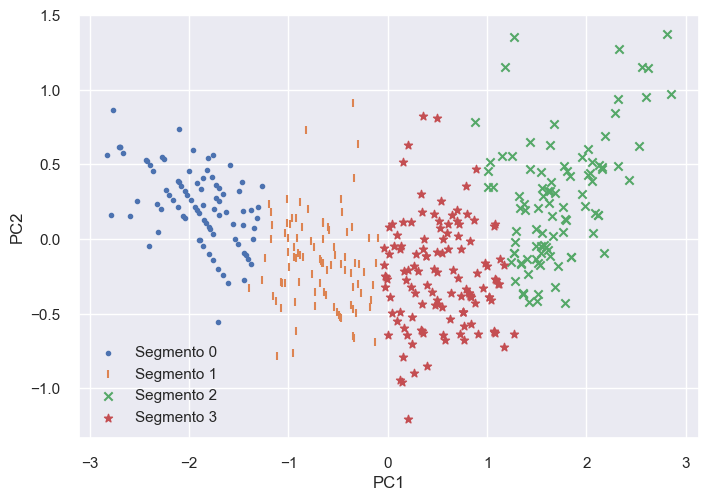

In [217]:
for segmento in range(4):
    temporal = datos_a_escalar[datos_a_escalar.Segmento3 == segmento]
    plt.scatter(temporal.PC1, temporal.PC2, marker=marcador[segmento],
                label='Segmento '+str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show();

In [218]:
from yellowbrick.cluster import KElbowVisualizer
#!pip install yellowbrick

In [219]:
modelo = KMeans()
visualizador = KElbowVisualizer(modelo, k=(1,15))
x = df.copy()
x.drop(labels=('Segmento'), axis=1, inplace=True)

In [220]:
from sklearn.preprocessing import normalize
import pandas as pd


In [221]:
x['mpg'] = pd.get_dummies(df['mpg']).values[:, 0]

In [222]:
x = x.fillna(x.mean())
x1 = normalize(x)

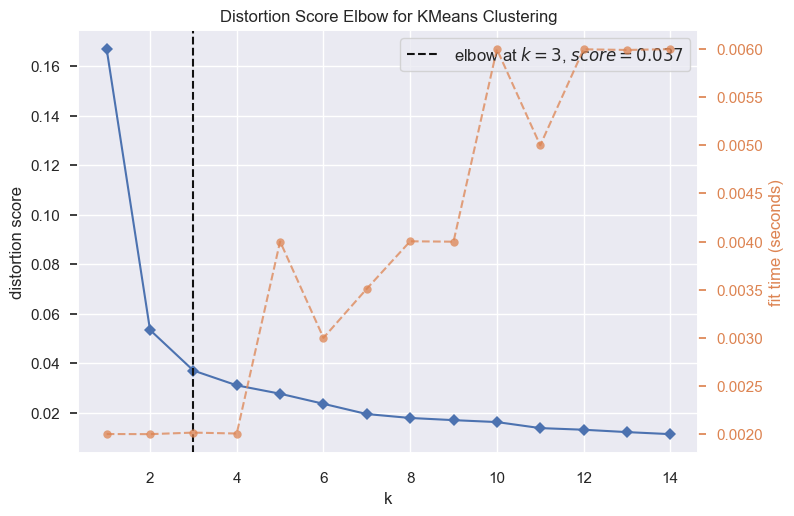

In [223]:
visualizador.fit(x1)
visualizador.show();

In [224]:
vehiculo = df[['mpg', 'cylinders', 'weight']].copy()

In [225]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, init='random')

In [226]:
prediccionkm = km.fit_predict(vehiculo)

In [227]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [228]:
silhouette_score(vehiculo, prediccionkm)

0.5673730343697725

In [229]:
calinski_harabasz_score(vehiculo, prediccionkm)

2051.0471566024676

In [230]:
# %matplotlib notebook # Para visualizar en 3D
%matplotlib inline

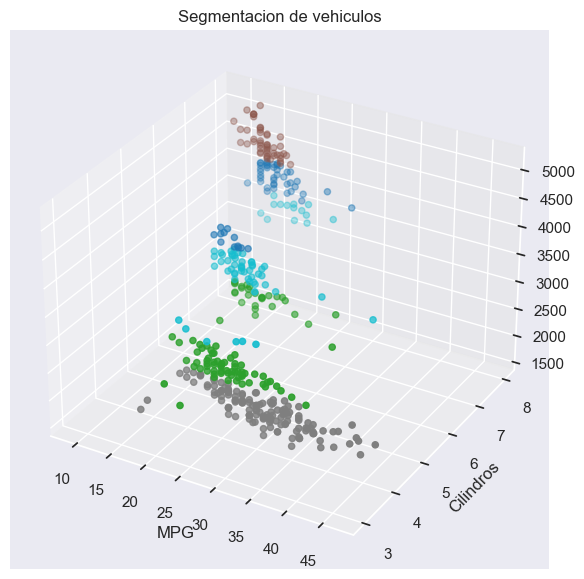

In [231]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(vehiculo['mpg'], vehiculo['cylinders'], vehiculo['weight'], c=prediccionkm, cmap='tab10')
plt.title('Segmentacion de vehiculos')
plt.xlabel('MPG')
plt.ylabel('Cilindros')
# plt.zlabel('Peso del carro')
plt.show();